In [1]:
!pip install kagglehub

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thovylnguyn/fakenewscorpus-full")

print("Path to dataset files:", path)

100%|██████████| 9.24G/9.24G [01:06<00:00, 150MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/thovylnguyn/fakenewscorpus-full/versions/1


In [3]:
import pandas as pd
df = pd.read_csv("/root/.cache/kagglehub/datasets/thovylnguyn/fakenewscorpus-full/versions/1/news_cleaned_big.csv")

<ipython-input-3-a3fd3d726363>:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/root/.cache/kagglehub/datasets/thovylnguyn/fakenewscorpus-full/versions/1/news_cleaned_big.csv")


In [4]:
df.head()

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
0,0,2,express.co.uk,rumor,https://www.express.co.uk/news/science/738402/...,"Life is an illusion, at least on a quantum lev...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Is life an ILLUSION? Researchers prove 'realit...,Sean Martin,NaN,[''],THE UNIVERSE ceases to exist when we are not l...,NaN,NaN,NaN
1,1,6,barenakedislam.com,hate,http://barenakedislam.com/category/donald-trum...,"Unfortunately, he hasn’t yet attacked her for ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Donald Trump,"Linda Rivera, Conrad Calvano, Az Gal, Lincoln ...",NaN,[''],NaN,NaN,NaN,NaN
2,2,7,barenakedislam.com,hate,http://barenakedislam.com/category/donald-trum...,The Los Angeles Police Department has been den...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Donald Trump,"Linda Rivera, Conrad Calvano, Az Gal, Lincoln ...",NaN,[''],NaN,NaN,NaN,NaN
3,3,8,barenakedislam.com,hate,http://barenakedislam.com/2017/12/24/more-winn...,The White House has decided to quietly withdra...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"MORE WINNING! Israeli intelligence source, DEB...","Cleavis Nowell, Cleavisnowell, Clarence J. Fei...",NaN,[''],NaN,NaN,NaN,NaN
4,4,9,barenakedislam.com,hate,http://barenakedislam.com/2017/12/25/oh-trump-...,“The time has come to cut off the tongues of t...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"“Oh, Trump, you coward, you just wait, we will...","F.N. Lehner, Don Spilman, Clarence J. Feinour,...",NaN,[''],NaN,NaN,NaN,NaN


In [5]:
columns_to_drop = [
    'Unnamed: 0', 'url', 'scraped_at', 'inserted_at', 'updated_at',
    'authors', 'meta_keywords', 'source'
]

In [6]:
# Drop the unnecessary columns
df = df.drop(columns=columns_to_drop)


In [7]:
unique_targets = df['type'].unique()
unique_targets

array(['rumor', 'hate', 'unreliable', 'conspiracy', 'clickbait', 'satire',
       'fake', 'reliable', 'bias', 'political', 'junksci', nan, 'unknown',
       '2018-02-02 01:19:41.756664', '2018-02-07 23:39:33.852696',
       '2017-11-10T11:18:44.524042', '2018-02-08 19:18:34.468066',
       ' including Iraq', '2018-02-08 19:18:34.468038',
       '” said Linton Roberts', '2018-02-10 13:43:39.521661'],
      dtype=object)

In [8]:
relevant_labels = ['fake', 'reliable']

# Filter the dataset to keep only rows with relevant labels
df_filtered = df[df['type'].isin(relevant_labels)]

# Check the updated unique target variables
print("Updated unique target variables:")
print(df_filtered['type'].unique())

# Check the frequency of each remaining target variable
print("\nFrequency of each target variable:")
print(df_filtered['type'].value_counts())

# # Save the filtered dataset (optional)
# df_filtered.to_csv('FakeNewsCorpus_filtered.csv', index=False)

Updated unique target variables:
['fake' 'reliable']

Frequency of each target variable:
type
reliable    1913222
fake         894746
Name: count, dtype: int64


In [9]:
df_filtered.head()

,id,domain,type,content,title,keywords,meta_description,tags,summary
27,34,beforeitsnews.com,fake,Headline: Bitcoin & Blockchain Searches Exceed...,Surprise: Socialist Hotbed Of Venezuela Has Lo...,NaN,NaN,NaN,NaN
28,35,beforeitsnews.com,fake,Water Cooler 1/25/18 Open Thread; Fake News ? ...,Water Cooler 1/25/18 Open Thread; Fake News ? ...,NaN,NaN,NaN,NaN
29,36,beforeitsnews.com,fake,Veteran Commentator Calls Out the Growing “Eth...,Veteran Commentator Calls Out the Growing “Eth...,NaN,NaN,NaN,NaN
30,37,beforeitsnews.com,fake,"Lost Words, Hidden Words, Otters, Banks and Bo...","Lost Words, Hidden Words, Otters, Banks and Books",NaN,NaN,NaN,NaN
31,38,beforeitsnews.com,fake,Red Alert: Bond Yields Are SCREAMING “Inflatio...,Red Alert: Bond Yields Are SCREAMING “Inflatio...,NaN,NaN,NaN,NaN


In [10]:
columns_to_drop = [
    'keywords','meta_description', 'tags','summary'
]

In [11]:
df = df_filtered.drop(columns=columns_to_drop)

In [12]:
df.head()

,id,domain,type,content,title
27,34,beforeitsnews.com,fake,Headline: Bitcoin & Blockchain Searches Exceed...,Surprise: Socialist Hotbed Of Venezuela Has Lo...
28,35,beforeitsnews.com,fake,Water Cooler 1/25/18 Open Thread; Fake News ? ...,Water Cooler 1/25/18 Open Thread; Fake News ? ...
29,36,beforeitsnews.com,fake,Veteran Commentator Calls Out the Growing “Eth...,Veteran Commentator Calls Out the Growing “Eth...
30,37,beforeitsnews.com,fake,"Lost Words, Hidden Words, Otters, Banks and Bo...","Lost Words, Hidden Words, Otters, Banks and Books"
31,38,beforeitsnews.com,fake,Red Alert: Bond Yields Are SCREAMING “Inflatio...,Red Alert: Bond Yields Are SCREAMING “Inflatio...


In [12]:
df.to_csv('FakeNewsCorpus_final.csv', index=False)

In [13]:
nan_rows = df[df.isna().any(axis=1)]

# Display the NaN rows
print("Rows with NaN values:")
print(nan_rows)

# Count the number of NaN rows
print("\nNumber of NaN rows:", len(nan_rows))

Rows with NaN values:
                 id                domain      type  \
1800111     1027805     beforeitsnews.com      fake   
3158405     1930408     beforeitsnews.com      fake   
4263180   2633264.0     beforeitsnews.com      fake   
5535221   3594249.0     newswithviews.com      fake   
5789415     3861328      newsmagazine.com      fake   
5790964     3863438      newsmagazine.com      fake   
6550849     4684368     beforeitsnews.com      fake   
7485019     5827391     beforeitsnews.com      fake   
7897514     6423128     beforeitsnews.com      fake   
7961030     6508234     beforeitsnews.com      fake   
9682564     7997447     feeds.reuters.com  reliable   
9777698     8093753  uk.finance.yahoo.com  reliable   
9805020     8121160     feeds.reuters.com  reliable   
9806353     8122501     feeds.reuters.com  reliable   
9829528     8145787     feeds.reuters.com  reliable   
9924440     8241928     feeds.reuters.com  reliable   
9939576     8257299     feeds.reuters.com  

In [14]:
# Drop rows with NaN values in any column
df_filtered = df.dropna()

# Check if any NaN rows remain
print("Number of NaN rows after dropping:", df_filtered.isna().sum().sum())

Number of NaN rows after dropping: 0


In [15]:
df_filtered.head()

,id,domain,type,content,title
27,34,beforeitsnews.com,fake,Headline: Bitcoin & Blockchain Searches Exceed...,Surprise: Socialist Hotbed Of Venezuela Has Lo...
28,35,beforeitsnews.com,fake,Water Cooler 1/25/18 Open Thread; Fake News ? ...,Water Cooler 1/25/18 Open Thread; Fake News ? ...
29,36,beforeitsnews.com,fake,Veteran Commentator Calls Out the Growing “Eth...,Veteran Commentator Calls Out the Growing “Eth...
30,37,beforeitsnews.com,fake,"Lost Words, Hidden Words, Otters, Banks and Bo...","Lost Words, Hidden Words, Otters, Banks and Books"
31,38,beforeitsnews.com,fake,Red Alert: Bond Yields Are SCREAMING “Inflatio...,Red Alert: Bond Yields Are SCREAMING “Inflatio...


In [14]:
# Count the number of fake and reliable records
fake_count = df[df['type'] == 'fake'].shape[0]
reliable_count = df[df['type'] == 'reliable'].shape[0]

# Print the results
print(f"Total Fake Samples: {fake_count}")
print(f"Total Reliable Samples: {reliable_count}")

Total Fake Samples: 894746
Total Reliable Samples: 1913222


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

<ipython-input-17-07f5ea4ab3da>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df_filtered, palette='viridis')


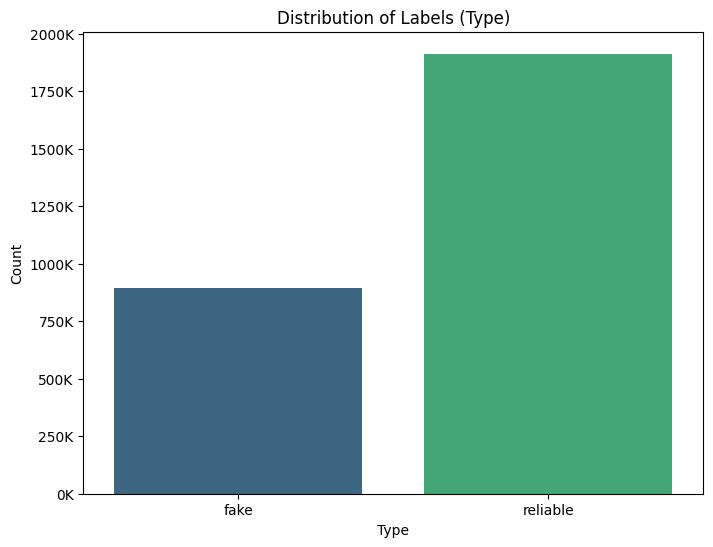

In [17]:
# Distribution of labels (type)
def format_thousands(x, _):
    return f'{int(x/1000)}K'  # Convert to 'K' format

# Plot distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df_filtered, palette='viridis')
plt.title('Distribution of Labels (Type)')
plt.xlabel('Type')
plt.ylabel('Count')

# Apply the custom y-axis formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))

plt.show()

In [18]:
df_filtered.head()
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2807941 entries, 27 to 11558722
Data columns (total 5 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   id       object
 1   domain   object
 2   type     object
 3   content  object
 4   title    object
dtypes: object(5)
memory usage: 128.5+ MB


In [19]:
# Using len() to count the rows
num_rows = len(df_filtered)

# Or using the .shape attribute
num_rows = df_filtered.shape[0]

print(f'The number of rows is: {num_rows}')


The number of rows is: 2807941


In [21]:
df = pd.read_csv('FakeNewsCorpus_final.csv')

In [22]:
df.head()

,id,domain,type,content,title
0,34.0,beforeitsnews.com,fake,Headline: Bitcoin & Blockchain Searches Exceed...,Surprise: Socialist Hotbed Of Venezuela Has Lo...
1,35.0,beforeitsnews.com,fake,Water Cooler 1/25/18 Open Thread; Fake News ? ...,Water Cooler 1/25/18 Open Thread; Fake News ? ...
2,36.0,beforeitsnews.com,fake,Veteran Commentator Calls Out the Growing “Eth...,Veteran Commentator Calls Out the Growing “Eth...
3,37.0,beforeitsnews.com,fake,"Lost Words, Hidden Words, Otters, Banks and Bo...","Lost Words, Hidden Words, Otters, Banks and Books"
4,38.0,beforeitsnews.com,fake,Red Alert: Bond Yields Are SCREAMING “Inflatio...,Red Alert: Bond Yields Are SCREAMING “Inflatio...


In [23]:
df_filtered = df.dropna()

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 1. Split the dataset into training and testing sets
X = df_filtered[['domain','title', 'content']]  # Features (raw text from 'domain' and 'content' columns)
y = df_filtered['type']                 # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Convert text to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf.fit_transform(X_train['content'])
X_test_tfidf = tfidf.transform(X_test['content'])

# 3. Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# 4. Evaluate the model
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9617050903774824

Classification Report:
              precision    recall  f1-score   support

        fake       0.95      0.93      0.94    178764
    reliable       0.97      0.97      0.97    382825

    accuracy                           0.96    561589
   macro avg       0.96      0.95      0.96    561589
weighted avg       0.96      0.96      0.96    561589


Confusion Matrix:
[[166878  11886]
 [  9620 373205]]


In [25]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 33.6 MB/s eta 0:00:00


In [58]:
import lightgbm as lgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df_filtered[['domain', 'title', 'content']]  # Features (raw text from 'domain' and 'content' columns)
y = df_filtered['type']                 # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine 'domain', 'title', and 'content' into a single text column
X_train_combined = X_train['domain'] + " " + X_train['title'] + " " + X_train['content']
X_test_combined = X_test['domain'] + " " + X_test['title'] + " " + X_test['content']

# Convert text to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train_combined)
X_test_tfidf = tfidf.transform(X_test_combined)

# Train the LightGBM model
model = lgb.LGBMClassifier()
model.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

[LightGBM] [Info] Number of positive: 1530380, number of negative: 715972
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 127.744486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1272455
[LightGBM] [Info] Number of data points in the train set: 2246352, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.681273 -> initscore=0.759630
[LightGBM] [Info] Start training from score 0.759630


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.9956213529823412

Classification Report:
              precision    recall  f1-score   support

        fake       0.99      0.99      0.99    178764
    reliable       1.00      1.00      1.00    382825

    accuracy                           1.00    561589
   macro avg       0.99      0.99      0.99    561589
weighted avg       1.00      1.00      1.00    561589


Confusion Matrix:
[[177517   1247]
 [  1212 381613]]


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_filtered is already defined
X = df_filtered[['domain', 'title', 'content']]  # Use all text features
y = df_filtered['type']  # Target variable

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine 'domain', 'title', and 'content' into a single text column
X_train_combined = X_train['domain'] + " " + X_train['title'] + " " + X_train['content']
X_test_combined = X_test['domain'] + " " + X_test['title'] + " " + X_test['content']

# Convert text to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf.fit_transform(X_train_combined)
X_test_tfidf = tfidf.transform(X_test_combined)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9872860757600309

Classification Report:
              precision    recall  f1-score   support

        fake       0.98      0.98      0.98    178764
    reliable       0.99      0.99      0.99    382825

    accuracy                           0.99    561589
   macro avg       0.99      0.98      0.99    561589
weighted avg       0.99      0.99      0.99    561589


Confusion Matrix:
[[174926   3838]
 [  3302 379523]]


In [37]:
train_accuracy = model.score(X_train_tfidf, y_train)
test_accuracy = model.score(X_test_tfidf, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9874667906009388
Testing Accuracy: 0.9872860757600309


In [38]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-validation scores: [0.98733059 0.98557441 0.98559886 0.98672736 0.98691878]
Mean CV Score: 0.98642999848421


In [49]:
def predict_news(domain, title, content, model, tfidf):
    # Combine input text
    combined_text = domain + " " + title + " " + content

    # Convert to TF-IDF features
    text_tfidf = tfidf.transform([combined_text])

    # Make prediction
    prediction = model.predict(text_tfidf)[0]

    return prediction

# Example usage
domain = "theguardian.com"
title = "Tesla backer says Musk must reduce Trump work, as 46,000 Cybertrucks recalled"
content = "Tesla and Elon Musk are embroiled in a “brand tornado crisis moment” and the electric carmaker’s chief executive needs to cut back on his work for Donald Trump to stem the damage, one of the company’s biggest supporters has said.The warning came as Tesla announced a recall of 46,000 Cybertrucks in the US on Thursday to fix an exterior panel that could detach while driving.On Wednesday, protesters said they were planning what they described as their biggest day of action yet against the EV maker, with 500 demonstrations expected at Tesla showrooms around the world on 29 March.It also emerged that the Vancouver International Auto Show has removed Tesla from its event hours, citing security concerns."

predicted_label = predict_news(domain, title, content, model, tfidf)
print("Predicted Type:", predicted_label)

Predicted Type: reliable


In [ ]:
def predict_news(domain, title, content, model, tfidf):
    # Combine input text
    combined_text = domain + " " + title + " " + content

    # Convert to TF-IDF features
    text_tfidf = tfidf.transform([combined_text])

    # Make prediction
    prediction = model.predict(text_tfidf)[0]

    return prediction

# Example usage
domain = "wane.com"
title = "Summer prices have hit the pumps!"
content = "FORT WAYNE, Ind. (WANE) – You may have noticed a jump in gas prices on Tuesday and Wednesday.Many gas stations in the Summit City have hiked up to $3.29 as of Wednesday. Patrick De Haan, head of petroleum analysis with GasBuddy, said this is normal for a price cycle in the spring time. This cycle was a $0.20 increase over the last, which he attributes to their switch to “summer gasoline”.Stations began using summer gasoline on Monday, which De Haan said is more expensive than winter gasoline. Gasoline used in the winter has more butane, which is plentiful and cheap, bringing down gas prices. Butane has a low boiling point, which means it starts to evaporate more and more with warmer weather.This results in ground-level ozone pollution which is harmful to humans and the environment. Butane’s high vapor pressure makes its use in gasoline blends mostly seasonal to lessen gasoline emissions."

predicted_label = predict_news(domain, title, content, model, tfidf)
print("Predicted Type:", predicted_label)

In [50]:
def predict_news(domain, title, content, model, tfidf):
    # Combine input text
    combined_text = domain + " " + title + " " + content

    # Convert to TF-IDF features
    text_tfidf = tfidf.transform([combined_text])

    # Make prediction
    prediction = model.predict(text_tfidf)[0]

    return prediction

domain = "worldhealthupdate.com"
title = "New Study Finds Herbal Tea Cures Diabetes in 2 Weeks"
content = ("A groundbreaking study conducted by independent researchers claims that a rare herbal tea found in the Amazon "
           "completely eliminates diabetes within just 14 days. Scientists are shocked by the results, and pharmaceutical companies "
           "are trying to suppress this information. The study, which has not yet been published in peer-reviewed journals, "
           "suggests that regular consumption of this tea can naturally balance blood sugar levels without the need for medication.")

predicted_label = predict_news(domain, title, content, model, tfidf)
print("Predicted Type:", predicted_label)


Predicted Type: fake


In [51]:
def predict_news(domain, title, content, model, tfidf):
    # Combine input text
    combined_text = domain + " " + title + " " + content

    # Convert to TF-IDF features
    text_tfidf = tfidf.transform([combined_text])

    # Make prediction
    prediction = model.predict(text_tfidf)[0]

    return prediction

domain = "economicinsightsdaily.com"
title = "Experts Warn: US Dollar to Be Replaced by Cryptocurrency in 2025"
content = ("Financial experts have issued an urgent warning that the US dollar may soon be replaced by a new government-backed "
           "cryptocurrency as early as 2025. Insiders claim that secret meetings between global economic leaders are already discussing "
           "the transition, which could dramatically impact savings accounts, retirement funds, and the entire banking system. "
           "While officials deny these claims, leaked documents suggest that a shift toward a digital-only currency is inevitable.")

predicted_label = predict_news(domain, title, content, model, tfidf)
print("Predicted Type:", predicted_label)



Predicted Type: fake


In [53]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.1 MB/s eta 0:00:00


In [54]:
#CNN
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df_filtered['content'])
X_train_seq = tokenizer.texts_to_sequences(X_train_combined)
X_test_seq = tokenizer.texts_to_sequences(X_test_combined)

# Pad sequences to ensure uniform input size
max_len = 100  # Adjust based on your dataset
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Convert labels to binary
y_train_bin = y_train.apply(lambda x: 0 if x == 'fake' else 1)
y_test_bin = y_test.apply(lambda x: 0 if x == 'fake' else 1)

# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=128, input_length=max_len),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train_bin, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test_bin)
print("Accuracy:", accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
56159/56159 ━━━━━━━━━━━━━━━━━━━━ 2956s 53ms/step - accuracy: 0.9627 - loss: 0.0930 - val_accuracy: 0.9728 - val_loss: 0.0692
Epoch 2/5
56159/56159 ━━━━━━━━━━━━━━━━━━━━ 2948s 52ms/step - accuracy: 0.9781 - loss: 0.0570 - val_accuracy: 0.9723 - val_loss: 0.0728
Epoch 3/5
56159/56159 ━━━━━━━━━━━━━━━━━━━━ 2946s 52ms/step - accuracy: 0.9839 - loss: 0.0429 - val_accuracy: 0.9756 - val_loss: 0.0654
Epoch 4/5
56159/56159 ━━━━━━━━━━━━━━━━━━━━ 2947s 52ms/step - accuracy: 0.9887 - loss: 0.0314 - val_accuracy: 0.9753 - val_loss: 0.0725
Epoch 5/5
56159/56159 ━━━━━━━━━━━━━━━━━━━━ 2948s 52ms/step - accuracy: 0.9923 - loss: 0.0218 - val_accuracy: 0.9732 - val_loss: 0.0754
17550/17550 ━━━━━━━━━━━━━━━━━━━━ 147s 8ms/step - accuracy: 0.9739 - loss: 0.0737
Accuracy: 0.9736533164978027


In [55]:
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
y_pred_prob = model.predict(X_test_pad)  # Predict probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary labels

# Print evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test_bin, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_bin, y_pred))


17550/17550 ━━━━━━━━━━━━━━━━━━━━ 142s 8ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96    178764
           1       0.98      0.98      0.98    382825

    accuracy                           0.97    561589
   macro avg       0.97      0.97      0.97    561589
weighted avg       0.97      0.97      0.97    561589


Confusion Matrix:
[[172467   6297]
 [  8499 374326]]
